In [55]:
#Importação da(s) biblioteca(s) necessária(s)
import pandas as pd


In [6]:
#Leitura dos arquivos
df1 = pd.read_excel('Aracaju.xlsx')
df2 = pd.read_excel('Fortaleza.xlsx')
df3 = pd.read_excel('Natal.xlsx')
df4 = pd.read_excel('Recife.xlsx')
df5 = pd.read_excel('Salvador.xlsx')

In [8]:
#Junção dos arquivos em um único dataframe
df = pd.concat([df1, df2, df3, df4, df5])

In [10]:
#Verificação das informações básicas do dataframe (nº de colunas e linhas, valores nulos e tipos de dados por coluna)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894 entries, 0 to 239
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Cidade  894 non-null    object        
 1   Data    894 non-null    datetime64[ns]
 2   Vendas  894 non-null    float64       
 3   LojaID  894 non-null    int64         
 4   Qtde    894 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 41.9+ KB


In [17]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde
216,Natal,2019-01-02,5.82,1035,1
235,Salvador,2019-01-03,41.84,1034,1
227,Salvador,2019-01-02,14.70,1035,1
2,Natal,2019-03-11,308.00,852,3
156,Salvador,2019-01-02,36.14,1037,3
172,Salvador,2019-01-02,6.70,1035,1
8,Natal,2019-03-27,667.00,852,4
69,Aracaju,2018-01-01,15.81,1523,1
79,Recife,2019-01-01,14.53,983,6
101,Fortaleza,2019-01-01,11.67,1005,4


In [18]:
#Alteração do tipo de dado da coluna LojaID uma vez que não faz sentido fazer operações matemáticas com o ID da Loja.
df["LojaID"] = df["LojaID"].astype("object")

In [22]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [23]:
#Confirmação da não existência de dados nulos
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [24]:
# Criação da coluna "Receita"
df["Receita"] = df["Vendas"]*df["Qtde"]

In [25]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
85,Recife,2019-01-01,182.52,983,1,182.52
57,Natal,2019-02-24,425.00,854,4,1700.00
106,Natal,2019-01-02,149.19,1035,2,298.38
115,Aracaju,2018-01-01,50.99,1522,10,509.90
3,Fortaleza,2019-02-10,20.95,1004,6,125.70


In [34]:
# Verificação da maior receita diária e da menor receita diária (independentemente da loja de origem).
maior_receita_dia = df["Receita"].max()
menor_receita_dia = df["Receita"].min()
print(f"Maior receita diária: R$ {maior_receita_dia:.2f}")
print(f"Menor receita diária: R$ {menor_receita_dia:.2f}")

Maior receita diária: R$ 3544.00
Menor receita diária: R$ 3.34


In [38]:
# Verificação das 3 maiores receita diárias (incluindo identificação da loja de origem)
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [40]:
# Verificação das 3 menores receita diárias (incluindo identificação da loja de origem)
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [52]:
# Cálculo do total de receita por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

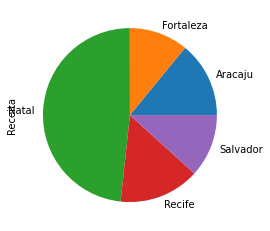

In [53]:
#Exibição do gráfico de Receita por Loja em formato de pizza
df.groupby("Cidade")["Receita"].sum().plot.pie();

In [44]:
#Cálculo do nº de vendas por loja
df["LojaID"].value_counts(ascending = False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
1523     29
852      29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

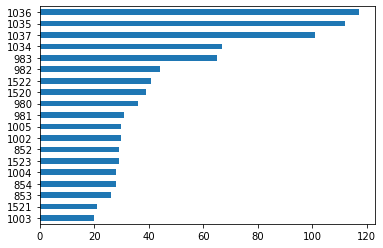

In [51]:
#Exibição do gráfico de nº de vendas por loja no formato de gráfico de barras
df["LojaID"].value_counts(ascending = True).plot.barh();